# CIFAR-10 IMAGES CLASSIFICATION

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


## IMPORT LIBRARIES & DATASETS

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

## DATA VISUALIZATION

[1]


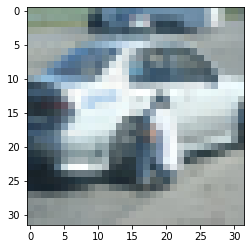

In [7]:
i = 30009
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


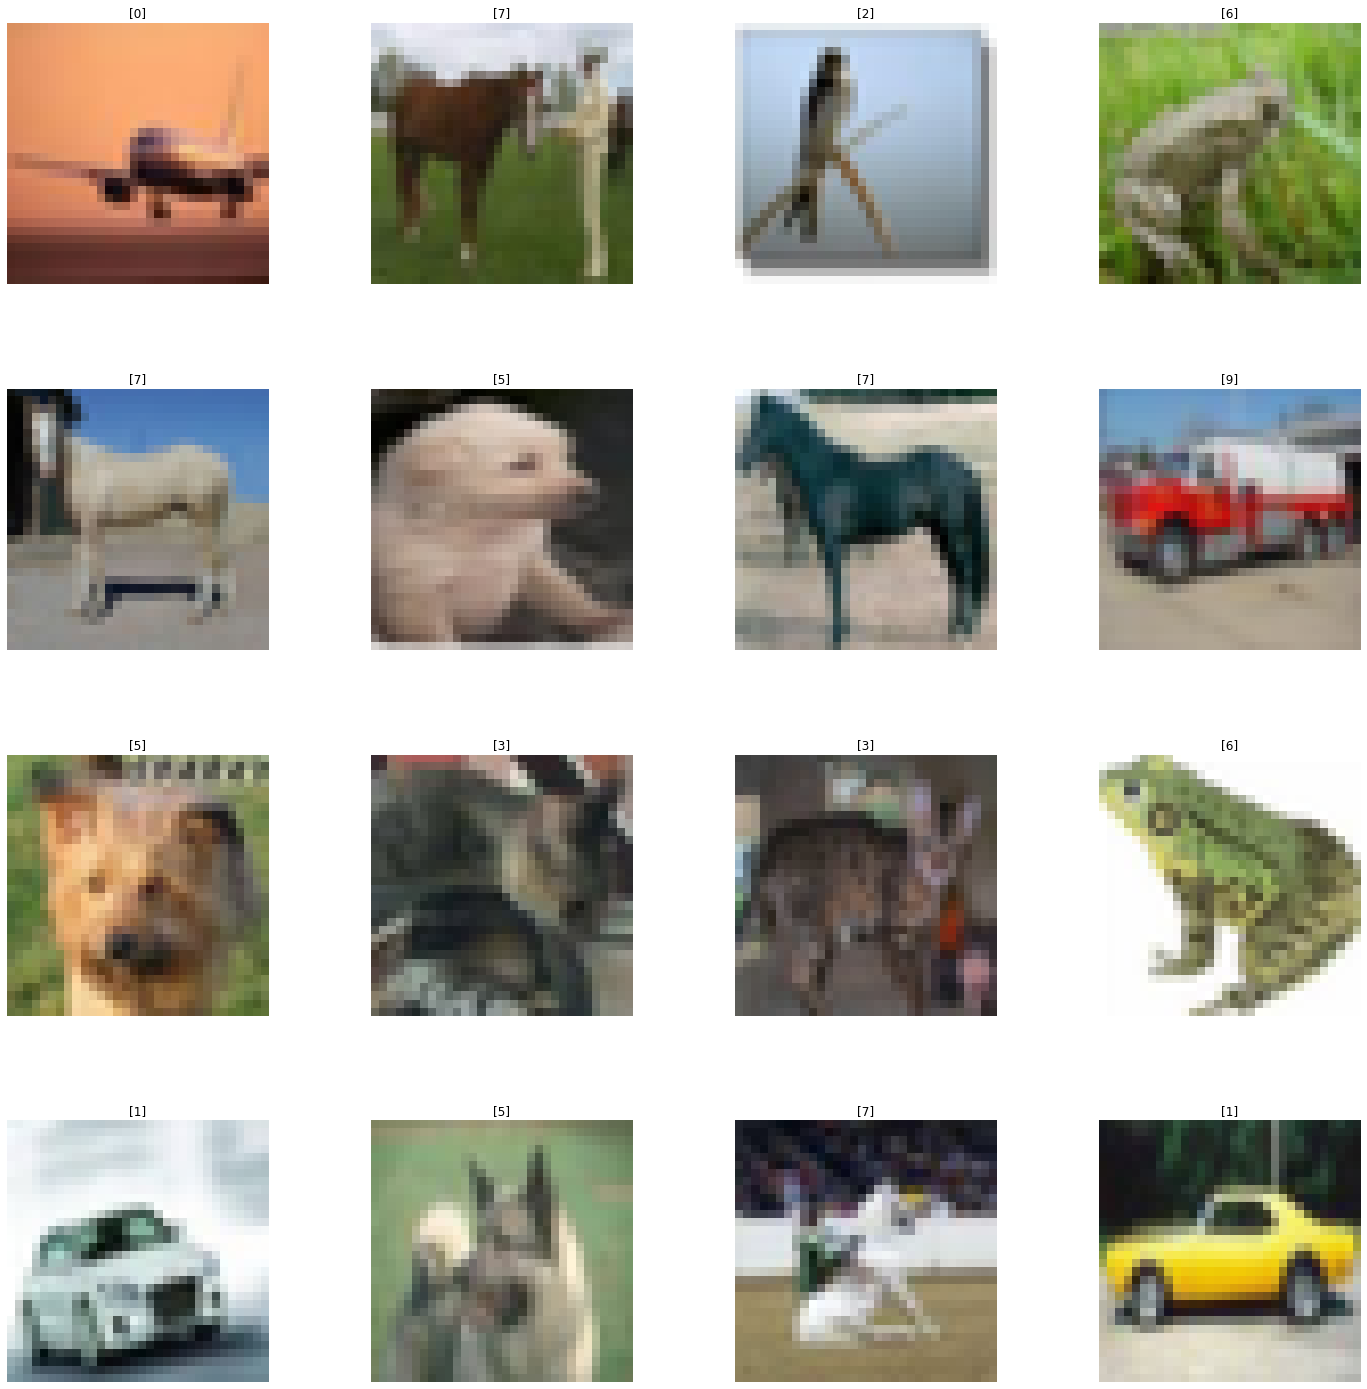

In [8]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

In [9]:
n_training

50000

## DATA PREPROCESSING

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
number_cat = 10

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
X_train = X_train/255
X_test = X_test/255


In [18]:
X_train.shape

(50000, 32, 32, 3)

In [19]:
Input_shape = X_train.shape[1:]

In [20]:
Input_shape

(32, 32, 3)

### TRAIN THE MODEL

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [43]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [44]:
cnn_model.compile(loss = 'categorical_crossentropy', 
                  optimizer = keras.optimizers.RMSprop(lr = 0.001), 
                  metrics = ['accuracy'])

In [25]:
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 10, shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 35s 18ms/step - loss: 1.8913 - accuracy: 0.3094
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2483 - accuracy: 0.5648
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1230 - accuracy: 0.6188
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0695 - accuracy: 0.6411
Epoch 5/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0404 - accuracy: 0.6576
Epoch 6/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0037 - accuracy: 0.6676
Epoch 7/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9848 - accuracy: 0.6701
Epoch 8/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9821 - accuracy: 0.6768
Epoch 9/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.9766 - accuracy: 0.6771
Epoch 10/10
1563/1563 [==============================] - 28s 18m

## EVALUATE THE MODEL

In [26]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.8992 - accuracy: 0.6862
Test Accuracy: 0.6862000226974487


In [27]:
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([6, 0, 8, ..., 5, 1, 7])

In [28]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
y_test = y_test.argmax(1)

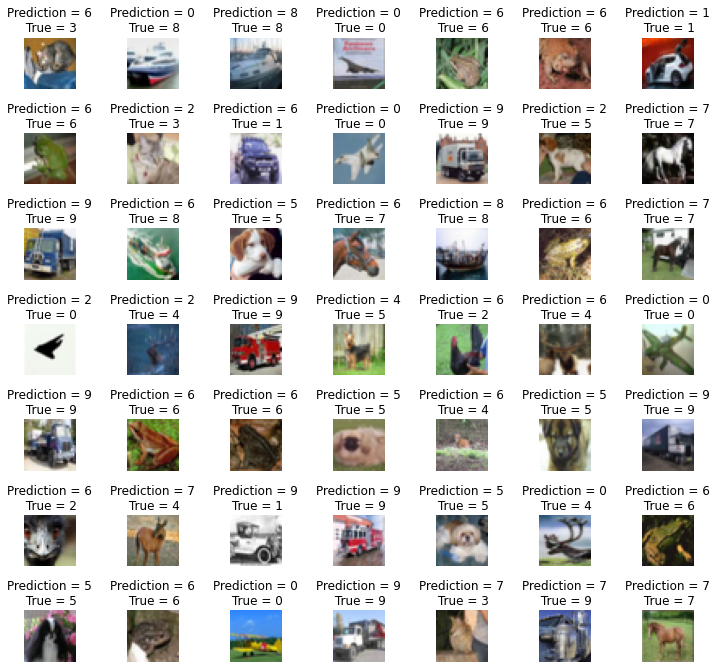

In [30]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

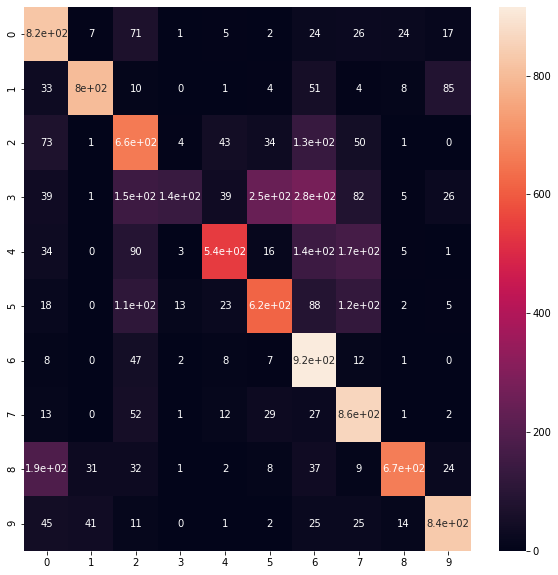

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

## SAVING THE MODEL

In [32]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

## DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [33]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [34]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [35]:
X_train.shape

(50000, 32, 32, 3)

In [36]:
n = 8 
X_train_sample = X_train[:n]

In [37]:
X_train_sample.shape

(8, 32, 32, 3)

In [38]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))


dataget_train.fit(X_train_sample)

In [ ]:
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1)
            ax.imshow(toimage(x_batch[i]))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;


## MODEL TRAINING USING AUGEMENTED DATASET

In [45]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [46]:
datagen.fit(X_train)

In [1]:
cnn_model.fit(datagen.flow(X_train, y_train, batch_size = 32), epochs = 10)

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)